In [1]:
import herbie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_temp(hour, celcius, PLOT):
    
    # In the future
    fxx = 0 if hour<20 else hour-19
    
    # Ajust to UTC (Maine is UTC-4)
    day='2024-05-22 ' if hour<20 else '2024-05-23 '
    hour=hour+4 if hour<20 else hour-20

    # Herbie object for the HRRR model 6-hr surface forecast
    H = herbie.Herbie(
      day + str(hour) + ':00',
      model='hrrr', 
      product='sfc', # 2D surface level fields
      fxx=fxx,
    )

    # Get dataset
    ds = H.xarray("TMP:2 m")
    if PLOT: ds.t2m.plot()

    # Get a specific point by coordinates
    test = herbie.accessors.HerbieAccessor(ds)
    latitude_value = 45.36
    longitude_value = -68.97
    points = pd.DataFrame({'latitude': [latitude_value], 'longitude': [longitude_value]})
    temperature = test.pick_points(points, method='nearest')['t2m'].values[0] 
    temperature = temperature-273 if celcius else temperature

    print(fxx)
    print(temperature)
    
    return temperature

In [3]:
temps = []
for i in range(24):
    try:
        temp = get_temp(i, True, False)
        temps.append(temp)
    except:
        temps.append(np.nan)
print(temps)

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 04:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


/Users/thomasdefauw/miniconda3/envs/adda/lib/python3.10/site-packages/herbie/core.py:1097: UserWarning: Will not remove GRIB file because it previously existed.
  warnings.warn("Will not remove GRIB file because it previously existed.")


0
18.08453369140625
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 05:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
16.943206787109375
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 06:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
16.271087646484375
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 07:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
15.482452392578125
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 08:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
15.325042724609375
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 09:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
15.01177978515625
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 10:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
15.76611328125
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 11:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
17.80548095703125
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
18.28790283203125
✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2024-May-22 13:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws
0
20.3380432128906

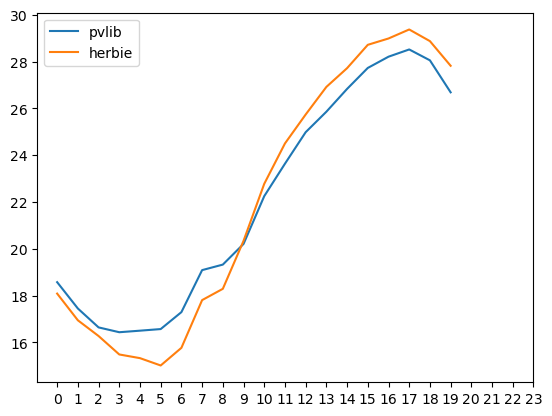

In [4]:
wf_pvlib = [18.572357177734375, 17.4473876953125, 16.63934326171875, 16.432830810546875, 
            16.4991455078125, 16.568023681640625, 17.2918701171875, 19.087127685546875, 
            19.323150634765625, 20.206207275390625, 22.2486572265625, 23.63507080078125, 
            24.981781005859375, 25.85711669921875, 26.83172607421875, 27.72772216796875, 
            28.20819091796875, 28.517913818359375, 28.053009033203125, 26.68548583984375]

plt.plot(wf_pvlib, label='pvlib')
plt.plot(temps,label='herbie')
plt.xticks(list(range(len(temps))))
plt.legend()
plt.show()